Buat matting sederhana, tempel gambar ke background

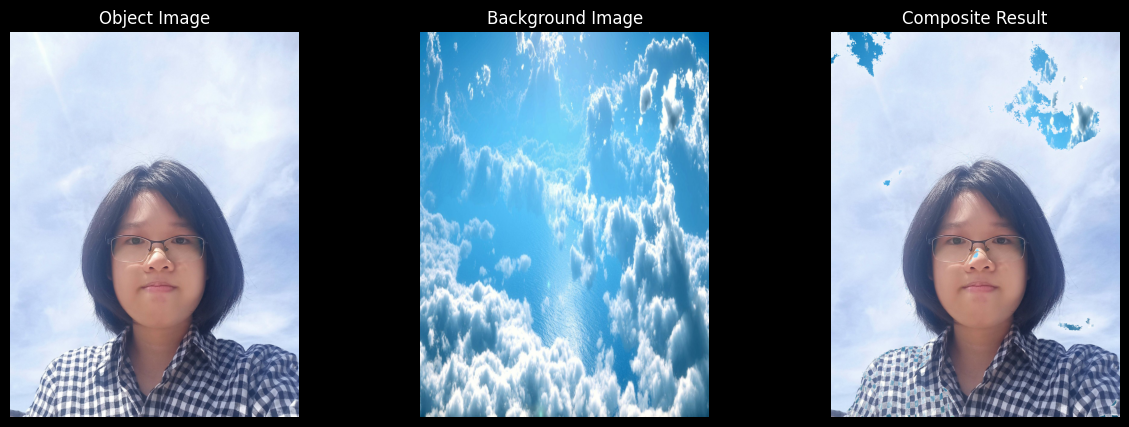

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_matting(object_image_path, background_image_path):
    # Read the object image
    object_image = cv2.imread(object_image_path)
    object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)
    
    # Read the background image
    background_image = cv2.imread(background_image_path)
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

    # Resize the background image to match the object image size
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Convert object image to grayscale
    gray = cv2.cvtColor(object_image, cv2.COLOR_RGB2GRAY)
    
    # Thresholding to get a binary mask
    ret, binary_mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    
    # Invert binary mask
    binary_mask = cv2.bitwise_not(binary_mask)
    
    # Convert binary mask to alpha matte
    alpha_matte = binary_mask.astype(np.float32) / 255.0
    
    # Composite object image and background image using alpha matte
    result = np.zeros_like(object_image, dtype=np.uint8)
    for i in range(3):
        result[:,:,i] = alpha_matte * object_image[:,:,i] + (1 - alpha_matte) * background_image[:,:,i]
    
    return object_image, background_image, result

def plot_images(object_image, background_image, result_image):
    plt.figure(figsize=(15, 5))
    
    # Plot object image
    plt.subplot(1, 3, 1)
    plt.imshow(object_image)
    plt.title('Object Image')
    plt.axis('off')
    
    # Plot background image
    plt.subplot(1, 3, 2)
    plt.imshow(background_image)
    plt.title('Background Image')
    plt.axis('off')
    
    # Plot composite image
    plt.subplot(1, 3, 3)
    plt.imshow(result_image)
    plt.title('Composite Result')
    plt.axis('off')
    
    plt.show()

# Example usage
object_image_path = 'rika.png'  # Replace with your object image file path
background_image_path = 'background.jpg'  # Replace with your background image file path

object_image, background_image, result_image = image_matting(object_image_path, background_image_path)
plot_images(object_image, background_image, result_image)
